#### 3. Data Understanding

Nachdem im Rahmen des Business Understandings die Begrifflichkeiten geklärt wurden und ein Verständnis für die relevanten Konstrukte besteht, werden im Folgenden zunächst die verwendeten Python-Bibliotheken kurz erklärt. Kenntnis über die Standard-Libraries wird vorausgesetzt.

##### *3.1 Relevante Python-Bibliotheken*

Python ist eine leistungsstarke sowie verständliche Programmiersprache und bietet sich aufgrund der zahlreichen Funktionen und Bibliotheken für Machine Learning Projekte an (McKinney, 2011). 

*Pandas (Version: 1.3.4)*: Pandas stellt eines der zentralen Python-Bibliotheken zur Datenmanipulation und -analyse dar. Das grundlegende Konzept von Pandas ist der sogenannte Dataframe, eine zweidimensionale tabellarische Datenstruktur mit Zeilen- und Spaltenbeschriftungen. Häufig wird Pandas in Kombination mit NumPy verwendet (hier Version: 1.20.3). Es ermöglicht dem Nutzer die schnelle Durchführung zahlreicher mathematischer Operationen auf Arrays (Nelli, 2018). 

*Matplotlib (Version: 3.7.0)*: Matplotlib ist ein effizientes Paket zur Erstellung einfacher und komplexer Plots und bietet vielfältige Visualisierungsmöglichkeiten (z.B. Diagramme, Histogramme, Streudiagramme). Das Konzept von Matplolib ist dreiteilig aufgebaut. Innerhalb der Pylab-Schnittstelle wird der Plot erstellt. Das Frontend stellt de Klassen und Funktionalität zum Erstellen und Verwalten der Diagramme bereit, die im Backend u.a. als Vektorgrafik, PNG oder Postscript-Hardcopy ausgegeben werden (Ari und Ustazhanov 2014).

*Seaborn (Version: 0.12.2*): Seaborn ist spezialisiert auf die Erstellung statistischer Grafiken und bietet eine High-Level-Schnittstelle zu Matplotlib. Außerdem ist Seaborn für die enge Integration mit Pandas-Datenstrukturen konzipiert. Vollständige Grafiken können mit wenigen Argumenten und nur einem Funktionsaufruf erstellt werden und bietet sich für die schnelle explorative Datenanalyse an (Waskom 2021).

*SciKit-learn (Version: 1.2.1)*: SciKit Learn ermöglicht eine einfache und schnelle Integration von Methoden des maschinellen Lernens (überwacht und unüberwacht) und umfasst eine große Bandbreite an Modellen für die Klassifikation und Regression. Es basiert auf anderen Bibliotheken wie Matplotlib und NumPy und bietet auch Werkzeuge zur Datenvorbereitung, darunter auch das im Modeling eingesetzte One-Hot-Encoding.Außerdem bringt es Tools zur Auswahl und Validierung von Modellen (z.B. Train-Test-Split, Kreuzvalidierung und Hyperparameter-Tuning) sowie zur Modellbewertung (Kramer, 2016). 


In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##### *3.1 Allgemeine Informationen zum Datensatz*

Für die vorliegende Projektarbeit wurde der [Kaggle Datensatz](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) "IBM HR Analytics Employee Attrition & Performance" herangezogen. Dieser bietet sich aufgrund der Bandbreite an erhobenen Variablen für prädiktive Analysen der Mitarbeiterfluktuation an. Allerdings handelt es sich um einen fiktiven Datensatz, der von IBM-Datenwissenschaftlern erstellt wurde.


In [32]:
# Pfad zur CSV-Datei hier einfügen
path = r"...\WA_Fn-UseC_-HR-Employee-Attrition.csv"

# CSV-Datei einlesen
df = pd.read_csv(path, sep=',')

# Spaltennamen bereinigen
df.columns = df.columns.str.strip()

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Insgesamt besteht der Datensatz aus 1.470 Erhebungen (Zeilen) und 35 Features (Variablen). Die folgende Tabelle gibt einen Überblick über die Merkmale, deren Datentypen sowie Ausprägungen. Die Zielvariable "Attrition" ist binär und gibt an, ob die Person das Unternehmen verlassen hat oder nicht. Da keine eindeutige Information darüber vorliegt, ob das Ausscheiden vom Unternehmen mitarbeiterinduziert oder durch den Arbeitgeber veranlasst wurde, wird pauschal von freiwilliger Mitarbeiterfluktuation ausgegangen. Neben "Attrition" gibt es noch 9 weitere ordinale Variablen, 10 nominal skalierte Variablen und 15 metrische bzw. verhältnisskalierte Variablen im Datensatz. Drei Variablen weisen nur eine Ausprägung auf und können deshalb keinem Skalenniveau zugeordnet werden. Da der Datensatz keiner echten Erhebung unterliegt und es sich um fiktive Daten handelt, sind keine fehlenden Werte vorhanden. Die Datenbereinigung entfällt somit größtenteils.


| #  | Variable                                            | Dtype                              | Ausprägung                                                                                                                                                                                                                           | Beschreibung                                                                                              |
| -- | --------------------------------------------------- | ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- |
| 1  | <font >Age</font>                      | <font >integer</font> | <font >18 - 60</font>                                                                                                                                                                                                   | <font >Alter</font>                                                                          |
| 2  | <font >Attrition</font>                | <font >object</font>  | <font >Yes,<br>No</font>                                                                                                                                                                                                | <font >Befragte Person<br>hat das Unternehmen verlassen</font>                               |
| 3  | <font >BusinessTravel</font>           | <font >object</font>  | <font >Non-Travel,<br>Travel_Rarely,<br>Travel_Frequently</font>                                                                                                                                                         | <font >Häufigkeit von Dienstreisen</font>                                                    |
| 4  | <font >DailyRate</font>                  | <font >integer</font>   | <font >102 - 1499</font>                                                                                                                                                                                                  | <font >Gehaltslevel (unklar)</font>                                                            |
| 5  | <font >Department</font>               | <font >object</font>  | <font >Human Resources,<br>Research & Development,<br>Sales</font>                                                                                                                                                      | <font >Abteilung</font>                                                                      |
| 6  | <font >DistanceFromHome</font>         | <font >integer</font> | <font >1 - 29</font>                                                                                                                                                                                                    | <font >Entfernung zwischen<br>Arbeitsplatz und Wohnung</font>                                |
| 7  | <font >Education</font>                | <font >integer</font> | <font >1 - Below College<br>2 - College<br>3 - Bachelor<br>4 - Master<br>5 - Doctor</font>                                                                                                                              | <font >Bildungsniveau</font>                                                                 |
| 8  | <font >EducationField</font>           | <font >object</font>  | <font >Life Sciences,<br>Other,<br>Medical,<br>Marketing,<br>Technical Degree,<br>Human Resources</font>                                                                                                                | <font >Ausbildungsbereich</font>                                                             |
| 9  | <font >EmployeeCount</font>             | <font >integer</font>  | <font >1</font>                                                                                                                                                                                                          | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 10 | <font >EmployeeNumber</font>           | <font >integer</font> | <font >1 - 1068</font>                                                                                                                                                                                                  | <font >Anzahl der Mitarbeiter<br>im Unternehmen</font>                                       |
| 11 | <font >EnvironmentSatisfaction</font>  | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit<br>mit der Arbeitsumgebung</font>                                       |
| 12 | <font >Gender</font>                   | <font >object</font>  | <font >Male,<br>Female</font>                                                                                                                                                                                           | <font >Geschlecht</font>                                                                     |
| 13 | <font >HourlyRate</font>               | <font >integer</font> | <font >30 - 100</font>                                                                                                                                                                                                  | <font >Stundenlohn</font>                                                                    |
| 14 | <font >JobInvolvement</font>           | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Job-Engagement</font>                                                                 |
| 15 | <font >JobLevel</font>                   | <font >integer</font>   | <font >1 - 5</font>                                                                                                                                                                                                       | <font >Ausprägungen unklar</font>                                                              |
| 16 | <font >JobRole</font>                  | <font >object</font>  | <font >Sales Executive,<br>Research Scientist,<br>Laboratory Technician,<br>Manufacturing Director,<br>Healthcare, Representative,<br>Manager,<br>Sales Representative,<br>Research Director,<br>Human Resources</font> | <font >Stellenbeschreibung</font>                                                            |
| 17 | <font >JobSatisfaction</font>          | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit<br>mit der Arbeit</font>                                                |
| 18 | <font >MaritalStatus</font>            | <font >object</font>  | <font >Married,<br>Divorced,<br>Single</font>                                                                                                                                                                           | <font >Familienstand</font>                                                                  |
| 19 | <font >MonthlyIncome</font>            | <font >integer</font> | <font >1.009 - 19.999</font>                                                                                                                                                                                            | <font >monatliches Einkommen</font>                                                          |
| 20 | <font >MonthlyRate</font>                | <font >integer</font>   | <font >2.094 -26.999</font>                                                                                                                                                                                               | <font >unklar</font>                                                                           |
| 21 | <font >NumCompaniesWorked</font>       | <font >integer</font> | <font >0 - 9 </font>                                                                                                                                                                                                    | <font >Anzahl der<br>bisherigen Arbeitgeber</font>                                           |
| 22 | <font >Over18</font>                    | <font >object</font>   | <font >Yes</font>                                                                                                                                                                                                        | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 23 | <font >OverTime</font>                 | <font >object</font>  | <font >Yes,<br>No</font>                                                                                                                                                                                                | <font >Überstunden</font>                                                                    |
| 24 | <font >PercentSalaryHike</font>          | <font >integer</font>   | <font >11 - 25</font>                                                                                                                                                                                                     | <font >prozentuale Gehaltserhöhung<br>(pro Jahr?)</font>                                       |
| 25 | <font >PerformanceRating</font>          | <font >integer</font>   | <font >1 - Low<br>2 - Good<br>3 - Excellent<br>4 - Outstanding</font>                                                                                                                                                     | <font >Leistungsbewertung<br>(aus dienstlicher Beurteilung<br>oder Selbsteinschätzung?)</font> |
| 26 | <font >RelationshipSatisfaction</font> | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit mit<br>sozialem Umfeld am Arbeitsplatz</font>                           |
| 27 | <font >StandardHours</font>             | <font >integer</font>  | <font >80</font>                                                                                                                                                                                                         | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 28 | <font >StockOptionLevel</font>           | <font >integer</font>   | <font >1 - 3</font>                                                                                                                                                                                                       | <font >Aktienoptionen (unklar)</font>                                                          |
| 29 | <font >TotalWorkingYears</font>        | <font >integer</font> | <font >0 - 40</font>                                                                                                                                                                                                    | <font >Arbeitsjahre</font>                                                                   |
| 30 | <font >TrainingTimesLastYear</font>      | <font >integer</font>   | <font >0 - 6</font>                                                                                                                                                                                                       | <font >Zeit für Fort-/Weiterbildung<br>in Stunden (unklar)</font>                              |
| 31 | <font >WorkLifeBalance</font>          | <font >integer</font> | <font >1 - Bad<br>2 - Good<br>3 - Better<br>4 - Best</font>                                                                                                                                                             | <font >Work-Life-Balance</font>                                                              |
| 32 | <font >YearsAtCompany</font>           | <font >integer</font> | <font >0 - 40</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>im Unternehmen</font>                                             |
| 33 | <font >YearsInCurrentRole</font>       | <font >integer</font> | <font >0 - 18</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>auf der aktuellen Stelle</font>                                   |
| 34 | <font >YearsSinceLastPromotion</font>  | <font >integer</font> | <font >0 - 15</font>                                                                                                                                                                                                    | <font >Jahre seit der<br>letzten Beförderung</font>                                          |
| 35 | <font >YearsWithCurrManager</font>     | <font >integer</font> | <font >0 - 17</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>unter dem aktuellen Vorgesetzten</font>                           |


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Allerdings scheint der Datensatz hinsichtlich der Verteilung der Variable "Attrition" unausgeglichen. So haben 1.233 (84 %) Mitarbeiter das Unternehmen nicht verlassen, lediglich 237 (16 %) sind ausgeschieden. Dies könnte die weitere Datenanalyse beeinflussen und muss beim Modeling beachtet werden.

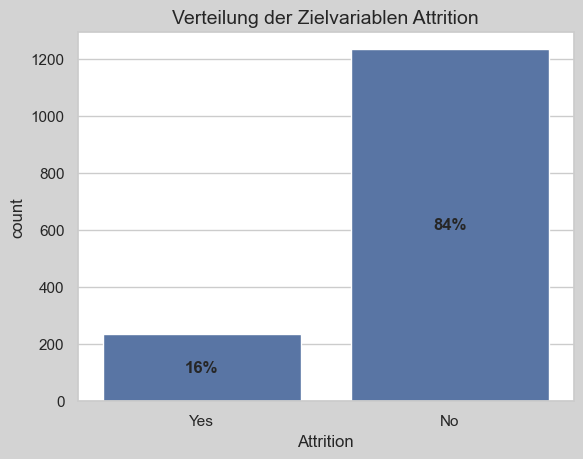

In [34]:
# Verteilung der Zielvariablen Attrition
attrition_percentage = df["Attrition"].value_counts(normalize=True) * 100

# Diagramm erstellen
plt.figure(facecolor='lightgrey')
ax = sns.countplot(x='Attrition', data=df)
ax.set_title('Verteilung der Zielvariablen Attrition', size=14)

for p in ax.patches:
    label = p.get_x() + p.get_width() / 2
    category = df['Attrition'].value_counts().index[abs(int(label)-1)] 
    percentage = attrition_percentage[category]
    
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2.,  
            f'{percentage:.0f}%',  
            ha='center', va='center',  
            fontsize=12,
            weight='bold')

Wie bereits erwähnt enthält der Datensatz einige Variablen, die für die weitere Datenenalyse keine Relevanz haben. Die drei Variablen "EmployeeCount", "Over18" und "StandardHours" besitzen nur eine Ausprägung und werden deshalb ausgeschlossen. Zudem gibt es mehrere Variablen, die auf monetäre Anreize verweisen ("HourlyRate", "DailyRate", "MonthlyRate", "PercentSalaryHike", "StockOptionLevel", "MonthlyIncome"). Bei den Gehaltssätzen gibt es 2 Arten: Monatssätze und Tagessätze. Einige Unternehmen wenden den Stundensatz an, der jedoch denselben Grundsätzen folgt wie der Tagessatz. Der Hauptunterschied besteht darin, dass tageweise Beschäftigte auf der Grundlage der tatsächlich geleisteten Arbeitstage bezahlt werden, während monatsweise Beschäftigte i.d.R. einen festen Betrag pro Lohnperiode erhalten. Da die Aussagekraft der Gehaltsvariablen nicht eindeutig ist, wird in späteren Auswertungen nur das monatliche Einkommen herangezogen. 

In [35]:
# Liste der relevanten Spalten
behaltene_spalten = ['Attrition','Age','BusinessTravel','Department','DistanceFromHome',
                     'Education','EducationField','EmployeeNumber','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel', 'JobRole',
                     'JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked',
                     'OverTime','RelationshipSatisfaction', 'PerformanceRating',
                     'TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                     'YearsSinceLastPromotion','YearsWithCurrManager']

# Behalten nur der relevanten Spalten
df = df.loc[:, behaltene_spalten]

# Anzeigen der ersten Zeilen des neuen DataFrames
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,Yes,1,3,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,No,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,Yes,2,3,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,Yes,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,No,4,3,6,3,2,2,2,2


##### *3.2 Deskriptive Statistik*

Um ein besseres Verständnis über den Datensatz zu bekommen, werden im Folgenden die Lageparameter sowie die Verteilung ausgewählter Variablen genauer beleuchtet. Beim Alter zeigt sich eine mittlere Tendenz um 36 Jahre, wobei die Streuung (*SD = 9.1*) relativ breit ist. Eine ähnliche Streuung zeigt sich auch bei der Entfernung vom Unternehmen zum Zuhause (*M = 9.2, SD = 8.1*). Im Schnitt scheinen die Personen mäßig zufrieden zu sein, sowohl mit ihrer Arbeitsumgebung (*M = 2.7, SD = 1.1*) als auch mit der Arbeit an sich (*M = 2.7, SD = 1.1*) und den zwischenmenschlichen Beziehungen (*M = 2.7, SD = 1.1*). Dementsprechend deutet auch das Arbeitsengagement auf eine moderate Beteiligung (*M = 2.7, SD = 0.7*) der Personen hin. Die Work-Life-Balance wird im Mittel mit 2.8 (*SD = 0.7*) von maximal 4 bewertet. Die meisten Mitarbeiter haben im Mittel für etwa 3 Firmen gearbeitet und 11.3 Jahre Berufserfahrung. Die Uneinigkeit bei der Leistungsbeurteilung ist relativ gering (*SD = 0.4*). Mit durchschnittlich 3.2 Punkten von 4 ist diese auch relativ hoch einzuschätzen. In der aktuellen Firma sind die Personen im Schnitt 7 Jahre tätig (*SD = 6.1*), und in ihrer aktuellen Position sind sie seit 4 Jahren (*SD = 3.6*) tätig. Das durchschnittliche Monatseinkommen liegt bei 6,402.90 Euro (*Md = 4,919.00 Euro*), wobei die Einkommensspanne (*SD = 4,708.00 Euro*) groß ist.

In [36]:
# Numerische Spalten identifizieren
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Statistiken berechnen
stats = df[numeric_columns].agg(['min', 'max', 'mean', 'median', 'std']).transpose()
stats_rounded = stats.round(1)

# Tabelle anzeigen
print(stats_rounded)

                             min      max    mean  median     std
Age                         18.0     60.0    36.9    36.0     9.1
DistanceFromHome             1.0     29.0     9.2     7.0     8.1
Education                    1.0      5.0     2.9     3.0     1.0
EmployeeNumber               1.0   2068.0  1024.9  1020.5   602.0
EnvironmentSatisfaction      1.0      4.0     2.7     3.0     1.1
JobInvolvement               1.0      4.0     2.7     3.0     0.7
JobLevel                     1.0      5.0     2.1     2.0     1.1
JobSatisfaction              1.0      4.0     2.7     3.0     1.1
MonthlyIncome             1009.0  19999.0  6502.9  4919.0  4708.0
NumCompaniesWorked           0.0      9.0     2.7     2.0     2.5
RelationshipSatisfaction     1.0      4.0     2.7     3.0     1.1
PerformanceRating            3.0      4.0     3.2     3.0     0.4
TotalWorkingYears            0.0     40.0    11.3    10.0     7.8
WorkLifeBalance              1.0      4.0     2.8     3.0     0.7
YearsAtCom

Untersucht man die Geschlechtergruppen hinsichtlich möglicher Diskrepanzen im Hinblick auf Alter, Arbeitszufriedenheit und Durchschnitssgehalt, fällt auf, dass kaum Unterschiede zwischen Männer und Frauen bestehen.Das Durchschnittsalter ist mit einer Abweichung von unter einem Jahr (*M<sub>weiblich</sub> = 37.3 ; M<sub>männlich</sub> = 36.7*) fast identisch.

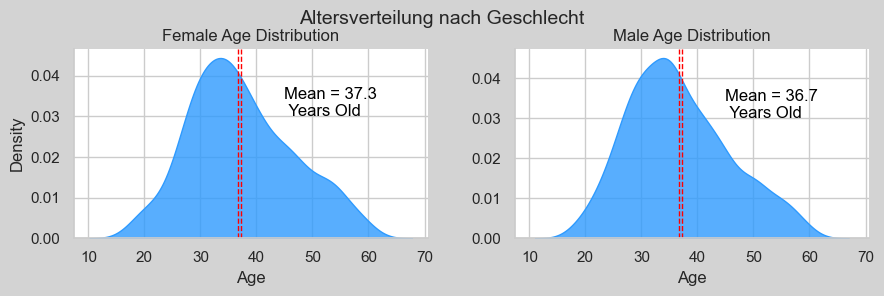

In [37]:
# Altersverteilung nach Geschlecht
sns.set(style="whitegrid")

# Datensätze vorbereiten
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
dat_text = pd.DataFrame({
    'label': [f"Mean = {mean_age_female:.2f} \n Years Old", f"Mean = {mean_age_male:.2f} \n Years Old"],
    'Gender': ['Female', 'Male']
})

# Erstellen des FacetGrid
gender_dist = sns.FacetGrid(df[df['Gender'].isin(['Female', 'Male'])], col="Gender", sharey=False, aspect=1.5)
gender_dist.map(sns.kdeplot, 'Age', fill=True, alpha=0.8, color="#2E9AFE")
gender_dist.map(plt.axvline, x=mean_age_female, color='red', linestyle='--', lw=1)
gender_dist.map(plt.axvline, x=mean_age_male, color='red', linestyle='--', lw=1)

for ax, gender in zip(gender_dist.axes.flat, ['Female', 'Male']):
    mean_age = mean_age_female if gender == 'Female' else mean_age_male
    ax.text(45, 0.03, f'Mean = {mean_age:.1f} \n Years Old', ha='left', fontsize=12, color='black')

gender_dist.set_titles("{col_name} Age Distribution")
plt.subplots_adjust(top=5.75)
gender_dist.set_axis_labels('Age', 'Density')
plt.subplots_adjust(top=0.85)
gender_dist.fig.patch.set_facecolor('lightgrey')
gender_dist.fig.suptitle('Altersverteilung nach Geschlecht', size=14)
plt.show()


Der folgende Boxplot stellt zusätzlich zum Geschlecht die Unterschiede in der Arbeitszufriedenheit dar, abhängig davon, ob ein Mitarbeiter das Unternehmen ausgeschieden ist oder nicht. Mitarbeiter, die das Unternehmen verlassen haben, zeigen unabhängig vom Geschlecht tendenziell eine niedrigere Jobzufriedenheit. Umgekehrt weisen Mitarbeiter, die geblieben sind, eine höhere Zufriedenheit auf. Dies deutet darauf hin, dass die Jobzufriedenheit ein wichtiger Faktor für die Mitarbeiterfluktuation darstellt. Unterschiede in den Mustern der Jobzufriedenheit zwischen Männern und Frauen innerhalb der gleichen Fluktuationsgruppe scheinen nicht signifikant zu sein.

C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


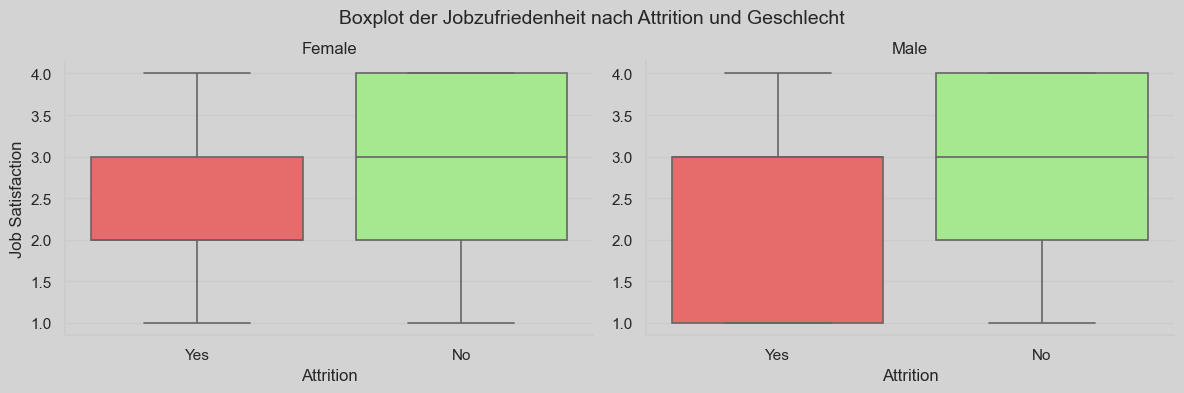

In [38]:
# Boxplot der Jobzufriednheit nach Geschlecht
sns.set(style="whitegrid")

attrition_order = ['Yes', 'No']
g = sns.FacetGrid(df, col="Gender", sharey=False, height=4, aspect=1.5, palette={"Yes": "#FA5858", "No": "#9FF781"})
g.map(sns.boxplot, 'Attrition', 'JobSatisfaction', order=attrition_order, linewidth=1.2, palette={"Yes": "#FA5858", "No": "#9FF781"})

# Grafik formatieren
g.set_titles("{col_name}")
g.set_axis_labels('Attrition', 'Job Satisfaction')
g.fig.suptitle('Boxplot der Jobzufriedenheit nach Attrition und Geschlecht', size=14)
plt.subplots_adjust(top=0.85)

g.fig.patch.set_facecolor('lightgrey')
for ax in g.axes.flat:
    ax.set_facecolor('lightgrey')

Die größte Diskrepanz zwischen den Geschlechtern lässt sich beim durchschnittlichen Gehalt (*M<sub>weiblich</sub> = 6686.57 Euro ; M<sub>männlich</sub> = 6380.51 Euro*) feststellen. Allerdings fällt hier die Differenz mit 306,06 Euro vergleichbar wenig ins Gewicht.

Differenz: € 306.06


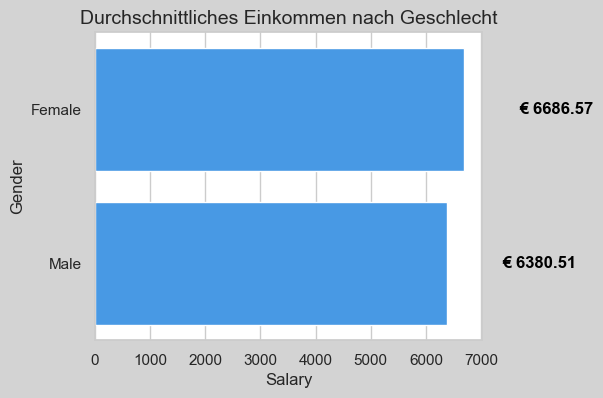

In [39]:
# Berechne das durchschnittliche Einkommen nach Geschlecht
gender_income = df.groupby('Gender')['MonthlyIncome'].mean().round(2).reset_index()
gender_income.rename(columns={'MonthlyIncome': 'avg_income'}, inplace=True)

# Barplot für das durchschnittliche Einkommen nach Geschlecht
plt.figure(figsize=(5, 4), facecolor='lightgrey')
income_plot = sns.barplot(data=gender_income, x='avg_income', y='Gender', color="#2E9AFE")
income_plot.set_title('Durchschnittliches Einkommen nach Geschlecht', size=14)
income_plot.set_xlabel('Salary')
income_plot.set_ylabel('Gender')

for p in income_plot.patches:
    width = p.get_width()
    income_plot.text(width + 1000, p.get_y() + p.get_height() / 2,
                     f'€ {width:.2f}',
                     ha='left', va='center',
                     color='black', fontweight='bold')

# Differenz
income_diff = gender_income['avg_income'].max() - gender_income['avg_income'].min()
print(f'Differenz: € {income_diff:.2f}')

Das Balkendiagramm lässt darauf schließen, dass der Bildungsstand keinen nennenswerten Einfluss auf die Fluktuation hat. Eine Ausnahme bilden Personen mit einem PhD, die im Vergleich weniger häufig das Unternehmen zu verlassen scheinen.

C:\Users\natal\AppData\Local\Temp\ipykernel_4420\1646495398.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'No'],
C:\Users\natal\AppData\Local\Temp\ipykernel_4420\1646495398.py:21: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'No'],
C:\Users\natal\AppData\Local\Temp\ipykernel_4420\1646495398.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'Yes'],
C:\Users\natal\AppData\Local\Temp\ipykernel_4420\1646495398.py:29: UserWarnin

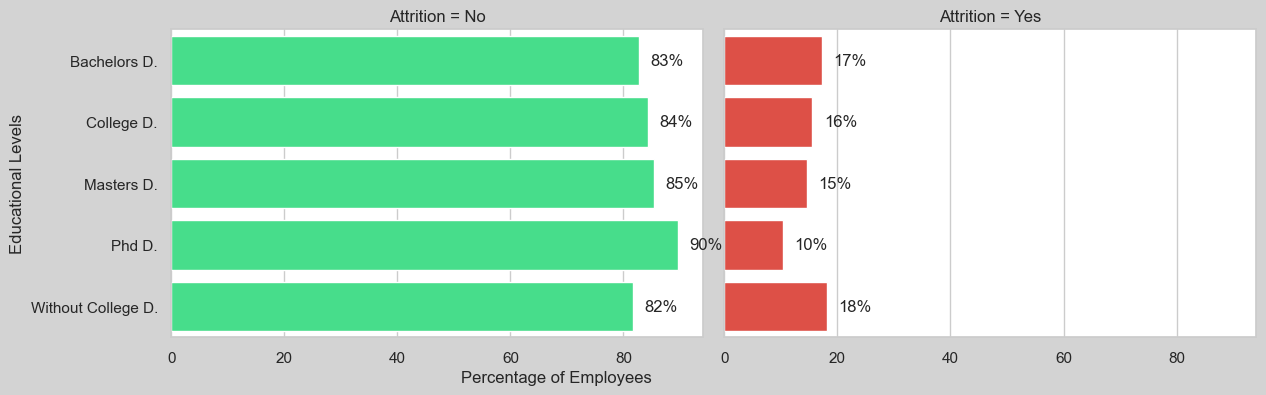

In [40]:
# Mapping
education_mapping = {
    1: "Without College D.",
    2: "College D.",
    3: "Bachelors D.",
    4: "Masters D.",
    5: "Phd D."
}
df['Educational_Levels'] = df['Education'].map(education_mapping)

# Zählen der Anzahl der Mitarbeiter nach Bildungsstufen und Attrition
edu_level_counts = df.groupby(['Educational_Levels', 'Attrition']).size().reset_index(name='n')
total_counts = df.groupby('Educational_Levels').size().reset_index(name='total')
edu_level_counts = edu_level_counts.merge(total_counts, on='Educational_Levels')
edu_level_counts['percentage'] = (edu_level_counts['n'] / edu_level_counts['total']) * 100

# Erstelle die Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True, sharex=True, facecolor='lightgrey')

# Plot für Attrition = 'No'
sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'No'],
            x='percentage', y='Educational_Levels', ax=axes[0],
            palette=['#2EF688'])
axes[0].set_title('Attrition = No')
axes[0].set_ylabel('Educational Levels')
axes[0].set_xlabel('')

# Plot für Attrition = 'Yes'
sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'Yes'],
            x='percentage', y='Educational_Levels', ax=axes[1],
            palette=['#F63A2E'])
axes[1].set_title('Attrition = Yes')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Anpassungen Grafiken
fig.text(0.4, 0.01, 'Percentage of Employees', ha='center', va='center', fontsize=12)

for ax in axes:
    for p in ax.patches:
        ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2., f'{p.get_width():.0f}%', ha="left", va="center")

plt.subplots_adjust(wspace=0.04, hspace=0.1)
plt.show()

In [41]:
# Die zuvor eingefügte Spalte Educational_Levels wird wieder entfernt
df = df.drop('Educational_Levels', axis=1)

Wie eingangs erwähnt, sind im Datensatz drei Variablen zur Zufriedenheit der Mitarbeitenden erfasst ("EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction"). Um zu beurteilen, ob zwischen diesen Variablen hohe Interkorrelationen bestehen und somit im Zweifel eine Zufriedenheitsvariable ausgeschlossen werden kann, wird untenstehend eine Korrelationsmatrix dargestellt. Die Ergebnisse implizieren keine signifikanten Zusammenhänge, was verdeutlicht, dass es sich um fiktive Daten handelt. In der Realität würden die drei Zufriedenheitsskalen bzw. Konstrukte einen hohen Anteil gemeinsamer Varianz binden.

<Axes: >

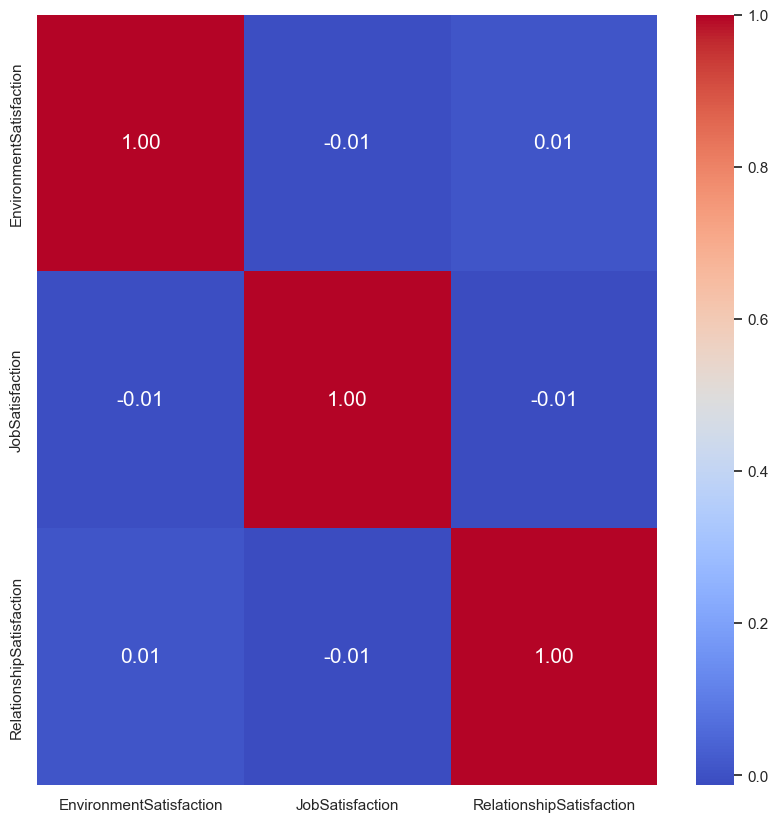

In [42]:
# Prüfung, ob Korrelationen zwischen den Zufriedenheits-Variablen besteht

Satisfaction = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]
Satisfaction.corr()

plt.figure(figsize=(10,10))
sns.heatmap(Satisfaction.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

Das Balkendiagramm stellt das durchschnittliche Einkommen nach Abteilung und Fluktuation (Ja/Nein) dar. In allen Abteilungen scheint es eine große Einkommensdifferenz zwischen Personen, die noch im Unternehmen sind, und denen, die es verlassen haben. Besonders auffällig ist der Einkommensunterschied in der Human Resources Abteilung, während die Differenz im Bereich Sales am geringsten ausfällt. Die Ergebnisse deuten darauf hin, dass ein höheres Einkommen möglicherweise ein Faktor für eine geringere Fluktuation ist und unterstreichen die Erkenntnisse aus der Literaturrecherche.Unabhängig von der Fluktuation zeigt sich, dass die Einkommensunterschiede zwischen den Abteilungen signifikant sind. Human Resources weist die größte Variation im Einkommen auf, gefolgt von Research & Development. Die Sales-Abteilung hat die geringste Einkommensvariation.

C:\Users\natal\AppData\Local\Temp\ipykernel_4420\1704545310.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


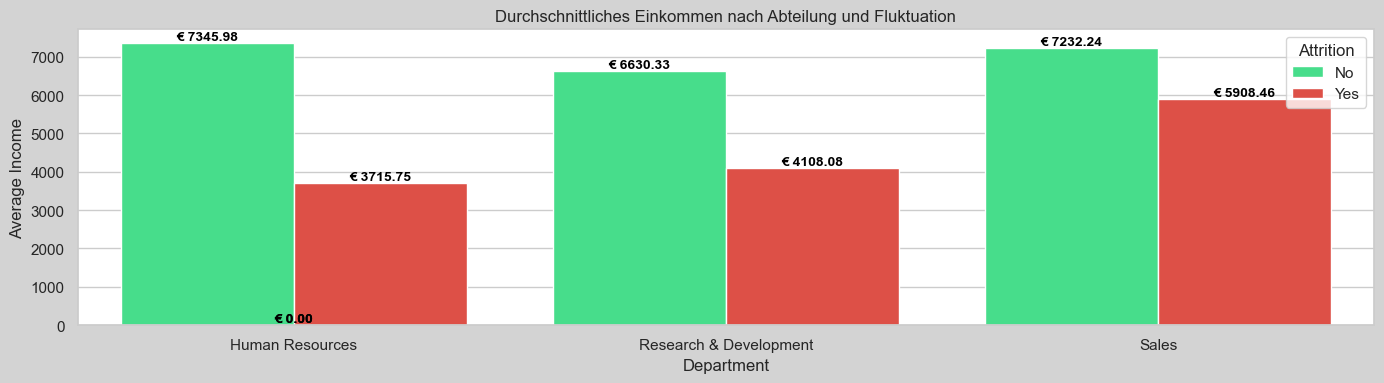

In [43]:
# Durchschnittliches Einkommen nach Abteilung und Attrition berechnen
avg_income = df.groupby(['Attrition', 'Department']).agg(avg_inc=('MonthlyIncome', 'mean')).reset_index()

# Grafik 
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

sns.barplot(data=avg_income, x='Department', y='avg_inc', hue='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'], dodge=True)

ax.set_title('Durchschnittliches Einkommen nach Abteilung und Fluktuation')
ax.set_xlabel('Department')
ax.set_ylabel('Average Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.00, f"€ {height:.2f}",
            ha="center", va="bottom", fontsize=10, fontweight='bold', color='black', rotation=0)


plt.tight_layout()
plt.show()

In [44]:
# Berechnung von Durchschnitt, Median, Minimum und Maximum des Einkommens pro Abteilung
summary_stats = df.groupby('Department').agg(
    min_income=('MonthlyIncome', 'min'),
    max_income=('MonthlyIncome', 'max'),
    avg_income=('MonthlyIncome', 'mean'),
    median_income=('MonthlyIncome', 'median')
).reset_index()

summary_stats['difference'] = summary_stats['avg_income'] - summary_stats['median_income']
summary_stats = summary_stats.round({'min_income': 2, 'max_income': 2, 'avg_income': 2, 'median_income': 2, 'difference':2 })

# Anzeigen der Tabelle
print(summary_stats)

               Department  min_income  max_income  avg_income  median_income  \
0         Human Resources        1555       19717     6654.51         3886.0   
1  Research & Development        1009       19999     6281.25         4374.0   
2                   Sales        1052       19847     6959.17         5754.5   

   difference  
0     2768.51  
1     1907.25  
2     1204.67  


C:\Users\natal\AppData\Local\Temp\ipykernel_4420\498799852.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


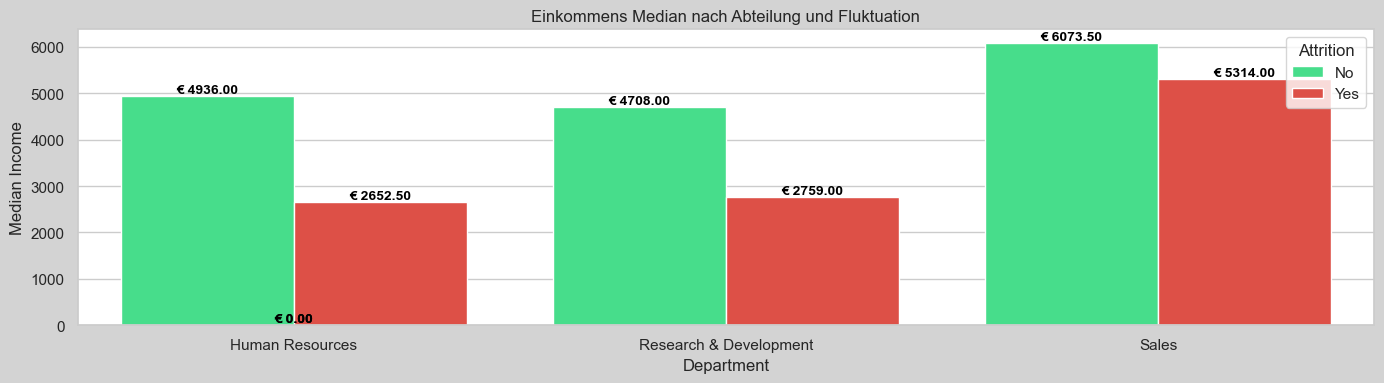

In [45]:
# Einkommens Median nach Abteilung und Attrition berechnen
median_income = df.groupby(['Attrition', 'Department']).agg(median_inc=('MonthlyIncome', 'median')).reset_index()

# Grafik 
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

sns.barplot(data=median_income, x='Department', y='median_inc', hue='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'], dodge=True)

ax.set_title('Einkommens Median nach Abteilung und Fluktuation')
ax.set_xlabel('Department')
ax.set_ylabel('Median Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.00, f"€ {height:.2f}",
            ha="center", va="bottom", fontsize=10, fontweight='bold', color='black', rotation=0)


plt.tight_layout()
plt.show()

Bei der Betrachtung der durchschnittlichen Zufriedenheit in den drei Bereichen (Jobzufriedenheit, Umgebungszufriedenheit und Beziehungszufriedenheit) im Zusammenhang mit der Zielvariable zeigt sich über alle Skalen hinweg eine niedrigere Zufriedenheit bei Mitarbeitern, die das Unternehmen verlassen haben. Dies deutet darauf hin, dass die Zufriedenheit in verschiedenen Aspekten der Arbeit ein wichtiger Faktor für die Mitarbeiterfluktuation sein könnte. Besonders auffällig sind die Unterschiede in der Jobzufriedenheit und Umgebungszufriedenheit, während die Differenz in der Beziehungszufriedenheit etwas geringer ausfällt.

C:\Users\natal\AppData\Local\Temp\ipykernel_4420\3784310307.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_job_sat', ax=axes[0], palette=['#2EF688', '#F63A2E'])
C:\Users\natal\AppData\Local\Temp\ipykernel_4420\3784310307.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
C:\Users\natal\AppData\Local\Temp\ipykernel_4420\3784310307.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_env_sat', ax=axes[1], palette=['#2EF688', '#F63A2E'])
C:\Users\natal

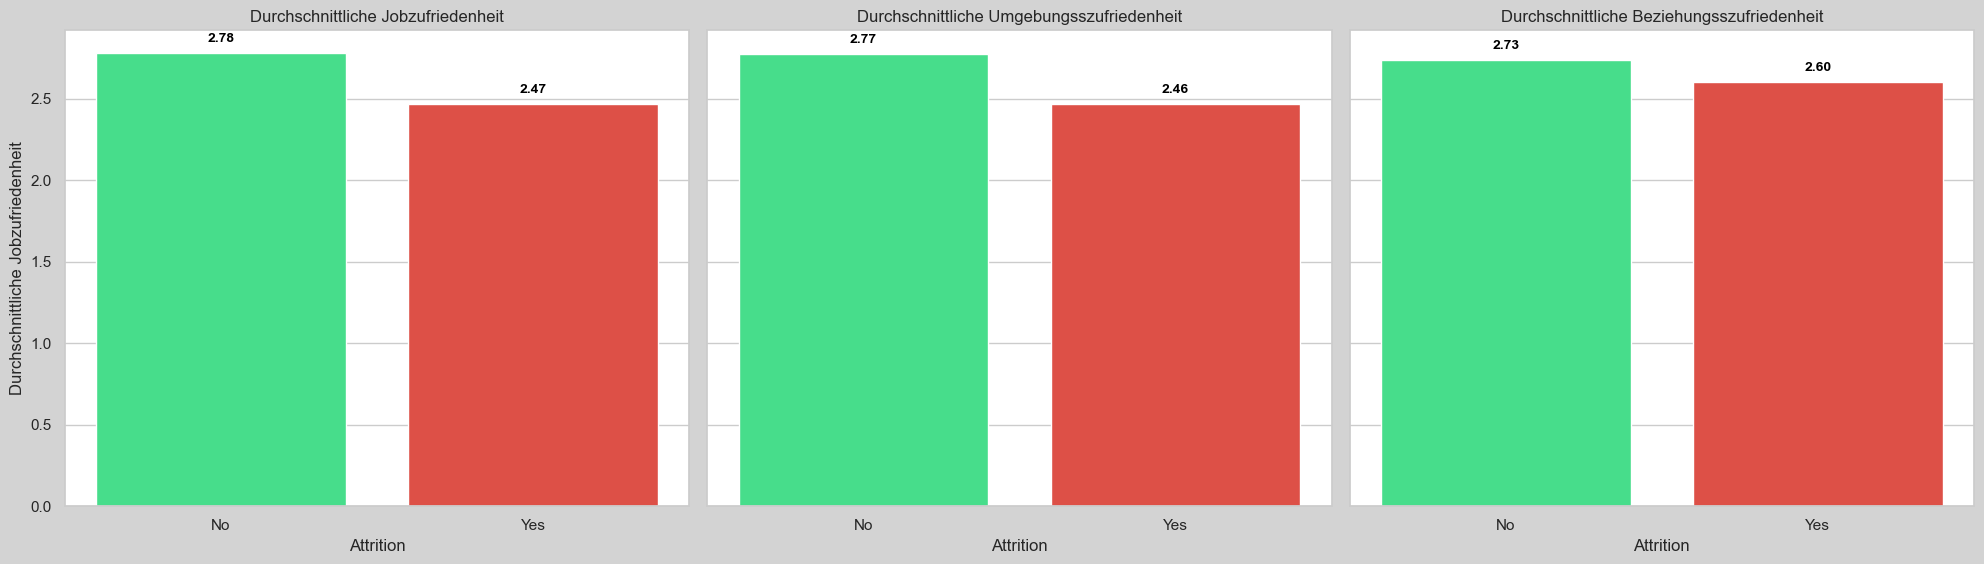

In [46]:
# Durchschnittliche Zufriedenheit berechnen
avg_satisfaction = df.groupby('Attrition').agg(
    avg_job_sat=('JobSatisfaction', 'mean'),
    avg_env_sat=('EnvironmentSatisfaction', 'mean'),
    avg_rel_sat=('RelationshipSatisfaction', 'mean')
).reset_index()

# Erstelle die Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5.8), sharey=True, facecolor='lightgrey')

# Job Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_job_sat', ax=axes[0], palette=['#2EF688', '#F63A2E'])
axes[0].set_title('Durchschnittliche Jobzufriedenheit')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Durchschnittliche Jobzufriedenheit')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Environment Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_env_sat', ax=axes[1], palette=['#2EF688', '#F63A2E'])
axes[1].set_title('Durchschnittliche Umgebungsszufriedenheit')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Durchschnittliche Umgebungsszufriedenheit')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Relationship Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_rel_sat', ax=axes[2], palette=['#2EF688', '#F63A2E'])
axes[2].set_title('Durchschnittliche Beziehungsszufriedenheit')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Durchschnittliche Beziehungsszufriedenheit')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Layout
plt.tight_layout()
plt.show()

In [47]:
# Berechnung der minimalen und maximalen Werte für jedes Zufriedenheits-Feature
min_max_values = df.groupby('Attrition').agg(
    min_job_sat=('JobSatisfaction', 'min'),
    max_job_sat=('JobSatisfaction', 'max'),
    min_env_sat=('EnvironmentSatisfaction', 'min'),
    max_env_sat=('EnvironmentSatisfaction', 'max'),
    min_rel_sat=('RelationshipSatisfaction', 'min'),
    max_rel_sat=('RelationshipSatisfaction', 'max')
).reset_index()

# Rundung der Werte auf zwei Dezimalstellen
min_max_values = min_max_values.round({'min_job_sat': 2, 'max_job_sat': 2,
                                        'min_env_sat': 2, 'max_env_sat': 2,
                                        'min_rel_sat': 2, 'max_rel_sat': 2})

print(min_max_values)

  Attrition  min_job_sat  max_job_sat  min_env_sat  max_env_sat  min_rel_sat  \
0        No            1            4            1            4            1   
1       Yes            1            4            1            4            1   

   max_rel_sat  
0            4  
1            4  


Ein größerer Einfluss auf die Fluktuation scheint jedoch der Arbeitsweg zu haben. Mitarbeiter, die das Unternehmen verlassen haben, haben im Durchschnitt einen längeren Arbeitsweg (*M<sub>Attrition yes</sub> = 10.63 ; M<sub>Attrition no</sub> = 8.92*).

C:\Users\natal\AppData\Local\Temp\ipykernel_4420\251896460.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_distance, x='AverageDistance', y='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'])


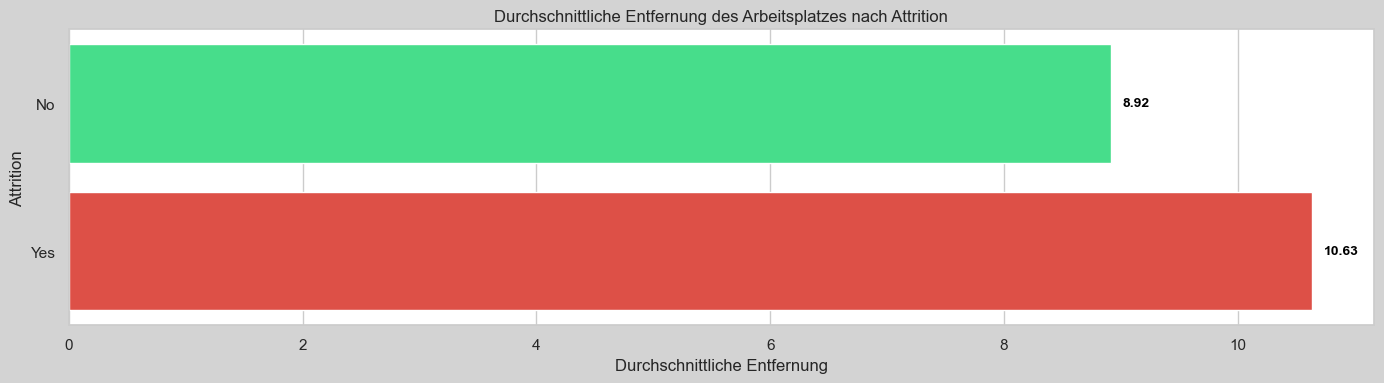

In [48]:
# Durchschnittliche Entfernung des Arbeitsplatzes nach Attrition berechnen
avg_distance = df.groupby('Attrition')['DistanceFromHome'].mean().reset_index()
avg_distance.columns = ['Attrition', 'AverageDistance']

# Erstelle die Subplots
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

# Balkendiagramm erstellen
sns.barplot(data=avg_distance, x='AverageDistance', y='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'])

# Setze Titel und Achsenbeschriftungen
ax.set_title('Durchschnittliche Entfernung des Arbeitsplatzes nach Attrition')
ax.set_xlabel('Durchschnittliche Entfernung')
ax.set_ylabel('Attrition')

# Werte auf den Balken anzeigen
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2., f'{width:.2f}', 
            ha="left", va="center", fontsize=10, fontweight='bold', color='black')

# Layout optimieren
plt.tight_layout()

# Zeige die Grafik
plt.show()

#### 4. Data Preparation

Nachdem nun ein Überblick zur Datenverteilung und den wichtigen Lageparametern besteht, müssen die Daten zur weiteren Verarbeitung vorbereitet werden. Wie bereits erwähnt, fällt dieser Schritt aufgrund der hypothetischen Daten relativ gering aus. 

Damit die Features mit dem Datentyp "object" beim Modellieren einfließen können, müssen diese zunächst in numerische und anschließend in binäre Form (boolean) kodiert werden. Ein mögliches Verfahren hierfür ist das One-Hot-Encoding. Beim One-Hot-Encoding wird der ursprüngliche Feature-Vektor auf eine mehrdimensionale Matrix erweitert, wobei die Dimension der Matrix der Anzahl der Zustände dieses Features entspricht und jede Dimension einen bestimmten Zustand darstellt. Dieser Prozess führt dazu, dass für einen gegebenen Zustand nur eine Dimension der Feature-Matrix aktiviert wird (normalerweise mit '1'), während alle anderen Zustandsdimensionen null sind (Yu et al. 2022).

Die zu kodierende Variablen werden im Folgenden dargestellt:


| Feature        | Datentype | Ausprägung                                                                                                                                                                                                                                    | Beschreibung                                  |
| -------------- | --------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------- |
| Attrition      | object    | 1 - Yes,<br>0 - No                                                                                                                                                                                                                            | Befragte Person hat das Unternehmen verlassen |
| BusinessTravel | object    | 0 - No Travel,<br>1 - Travel_Rarely,<br>2 - Travel_Frequently                                                                                                                                                                                 | Häufigkeit von Dienstreisen                   |
| Department     | object    | 0 - Human Resources,<br>1 - Research & Development,<br>2 - Sales                                                                                                                                                                              | Abteilung                                     |
| EducationField | object    | Life Sciences,<br>Other,<br>Marketing,<br>Medical,<br>Technical Degree,<br>Human Resources                                                                                                                                                    | Ausbildungsbereich                            |
| Gender         | object    | 0 - Male,<br>1 - Female                                                                                                                                                                                                                       | Geschlecht                                    |
| JobRole        | object    | 0 - Sales Executive,<br>1 - Research Scientist,<br>2 - Laboratory Technician,<br>3 - Manufacturing Director,<br>4 - Healthcare, Representative,<br>5 - Manager,<br>6 - Sales Representative,<br>7 - Research Director,<br>8 - Human Resources | Stellenbeschreibung                           |
| MaritalStatus  | object    | 0 - Married,<br>1 - Divorced,<br>2 - Single                                                                                                                                                                                                   | Familienstand                                 |
| OverTime       | object    | 1 - Yes,<br>0 - No                                                                                                                                                                                                                            | Überstunden                                   |

In [49]:
# One-Hot Encoding für nicht binäre Variablen
one_hot_encoded_df = pd.get_dummies(df, columns=['BusinessTravel',
                                                 'Department',
                                                 'EducationField',
                                                 'JobRole',
                                                 'MaritalStatus'])

# Die binären Variablen werden nicht encoded, sondern gemappt
# Gender: Male --> 0, Female --> 1
# Overtime: No --> 0, Yes --> 1 

# Mapping
gender_mapping = {
    "Male": 0,
    "Female": 1
}

overtime_mapping ={
    "No": 0,
    "Yes": 1
}

one_hot_encoded_df['Gender'] = one_hot_encoded_df['Gender'].map(gender_mapping)
one_hot_encoded_df['OverTime'] = one_hot_encoded_df['OverTime'].map(overtime_mapping)

one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Attrition                          1470 non-null   object
 1   Age                                1470 non-null   int64 
 2   DistanceFromHome                   1470 non-null   int64 
 3   Education                          1470 non-null   int64 
 4   EmployeeNumber                     1470 non-null   int64 
 5   EnvironmentSatisfaction            1470 non-null   int64 
 6   Gender                             1470 non-null   int64 
 7   JobInvolvement                     1470 non-null   int64 
 8   JobLevel                           1470 non-null   int64 
 9   JobSatisfaction                    1470 non-null   int64 
 10  MonthlyIncome                      1470 non-null   int64 
 11  NumCompaniesWorked                 1470 non-null   int64 
 12  OverTi

In [50]:
one_hot_encoded_df.head()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,Yes,41,1,2,1,2,1,3,2,4,...,False,False,False,False,False,True,False,False,False,True
1,No,49,8,1,2,3,0,2,2,2,...,False,False,False,False,True,False,False,False,True,False
2,Yes,37,2,2,4,4,0,2,1,3,...,True,False,False,False,False,False,False,False,False,True
3,No,33,3,4,5,4,1,3,1,3,...,False,False,False,False,True,False,False,False,True,False
4,No,27,2,1,7,1,0,3,1,2,...,True,False,False,False,False,False,False,False,True,False


In [51]:
# Aufbereitete Daten abspeichern für die weitere Verarbeitung
df.to_pickle('HR_Data_raw.pkl')
one_hot_encoded_df.to_pickle('HR_Data_One_Hot_Encoded.pkl')